In [65]:
# Import pandas modules
import pandas as pd
import numpy as np
import json
import os
import datetime as dt
import time as time
from time import mktime
import matplotlib.pyplot as plt    
    

In [66]:
# Isolate data items
# Date Range A: Normal Operating Period 22nd Dec 2017 - 25th Jan 2018
# Sampled 8 days of the 35 days total
# Time Block: 2pm - 8pm
# Carrier: Delta Airlines (DL)
# Airports: MCO, ATL

# Data Fields: airport code, date, carrier code, 
# Filter by scheduledGateDeparture, actualGateDeparture

# Need catch issue with departure date roll over where departure start time is less than departure end time
# Need to identify duplicate flights across adjacent days
# Example is Historic_Request_ATL_20190122_14.json flight 268

Date_Range_A_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['ATL', 'MCO']
Date_Range_A_Dates = ['20171222', '20171223', '20171224', '20171225','20180122', '20180123', '20180124', '20180125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_A_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_A_Dates:
        Date_Range_A_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_A_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_A_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]


Flight Counter: 1
Airline Flight#: DL656
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T10:55:00.000
Actual Departure: 2017-12-22T16:51:00.000
Flight Departure Delayed by (H:M:S): 5:56:00
Departure Time Delta (minutes): 356.0


Flight Counter: 2
Airline Flight#: DL1188
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T11:37:00.000
Actual Departure: 2017-12-22T13:52:00.000
Flight Departure Delayed by (H:M:S): 2:15:00
Departure Time Delta (minutes): 135.0


Flight Counter: 3
Airline Flight#: DL1586
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T13:30:00.000
Actual Departure: 2017-12-22T13:51:00.000
Flight Departure Delayed by (H:M:S): 0:21:00
Departure Time Delta (minutes): 21.0


Flight Counter: 4
Airline Flight#: DL1963
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T13:35:00.000
Actual Departure: 2017-12-22T14:04:00.000
Flight Departure Delayed by (H:M:S): 0:29:00
Departure Time Delta (minutes): 29.0


Flight Counter: 5
Airline F

Flight Counter: 64
Airline Flight#: DL1661
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T15:05:00.000
Actual Departure: 2017-12-22T15:11:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 65
Airline Flight#: DL370
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T15:05:00.000
Actual Departure: 2017-12-22T15:17:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 66
Airline Flight#: DL1250
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T15:05:00.000
Actual Departure: 2017-12-22T14:59:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 67
Airline Flight#: DL2184
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T15:05:00.000
Actual Departure: 2017-12-22T15:05:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 68
Airline Flight#: DL827
Airport: A

Flight Counter: 121
Airline Flight#: DL1964
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T16:30:00.000
Actual Departure: 2017-12-22T16:27:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 122
Airline Flight#: DL1176
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T16:30:00.000
Actual Departure: 2017-12-22T17:00:00.000
Flight Departure Delayed by (H:M:S): 0:30:00
Departure Time Delta (minutes): 30.0


Flight Counter: 123
Airline Flight#: DL1886
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T16:30:00.000
Actual Departure: 2017-12-22T16:27:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 124
Airline Flight#: DL109
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T16:30:00.000
Actual Departure: 2017-12-22T16:28:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 125
Airline Fl

Flight Counter: 162
Airline Flight#: DL1834
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T17:32:00.000
Actual Departure: 2017-12-22T17:32:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 163
Airline Flight#: DL1226
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T17:32:00.000
Actual Departure: 2017-12-22T17:41:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 164
Airline Flight#: DL91
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T17:35:00.000
Actual Departure: 2017-12-22T17:40:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 165
Airline Flight#: DL1646
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T17:40:00.000
Actual Departure: 2017-12-22T17:37:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 166
Airline Flight#: DL28
Airport:

Flight Counter: 211
Airline Flight#: DL2493
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T18:26:00.000
Actual Departure: 2017-12-22T18:23:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 212
Airline Flight#: DL1277
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T18:27:00.000
Actual Departure: 2017-12-22T18:25:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 213
Airline Flight#: DL2652
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T18:30:00.000
Actual Departure: 2017-12-22T18:41:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 214
Airline Flight#: DL2394
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T18:31:00.000
Actual Departure: 2017-12-22T18:41:00.000
Flight Departure Delayed by (H:M:S): 0:10:00
Departure Time Delta (minutes): 10.0


Flight Counter: 215
Airlin

Flight Counter: 254
Airline Flight#: DL1309
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T19:27:00.000
Actual Departure: 2017-12-22T19:25:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 255
Airline Flight#: DL1261
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T19:29:00.000
Actual Departure: 2017-12-22T19:27:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 256
Airline Flight#: DL2186
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T19:30:00.000
Actual Departure: 2017-12-22T19:29:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 257
Airline Flight#: DL2827
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T19:31:00.000
Actual Departure: 2017-12-22T19:31:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 258
Airline Flight#: DL2242
Airport:

Actual Departure: 2017-12-23T15:01:00.000
Flight Departure Delayed by (H:M:S): 1:26:00
Departure Time Delta (minutes): 86.0


Flight Counter: 290
Airline Flight#: DL2329
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T13:40:00.000
Actual Departure: 2017-12-23T13:40:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 291
Airline Flight#: DL1564
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T13:40:00.000
Actual Departure: 2017-12-23T13:56:00.000
Flight Departure Delayed by (H:M:S): 0:16:00
Departure Time Delta (minutes): 16.0


Flight Counter: 292
Airline Flight#: DL2224
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T13:40:00.000
Actual Departure: 2017-12-23T13:58:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 293
Airline Flight#: DL1403
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T13:40:00.000
Actual Departure: 2017-12-23T14:15:00.000
F

Flight Counter: 345
Airline Flight#: DL1250
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T15:05:00.000
Actual Departure: 2017-12-23T15:19:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 346
Airline Flight#: DL1416
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T15:05:00.000
Actual Departure: 2017-12-23T15:43:00.000
Flight Departure Delayed by (H:M:S): 0:38:00
Departure Time Delta (minutes): 38.0


Flight Counter: 347
Airline Flight#: DL1661
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T15:05:00.000
Actual Departure: 2017-12-23T15:57:00.000
Flight Departure Delayed by (H:M:S): 0:52:00
Departure Time Delta (minutes): 52.0


Flight Counter: 348
Airline Flight#: DL765
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T15:05:00.000
Actual Departure: 2017-12-23T15:38:00.000
Flight Departure Delayed by (H:M:S): 0:33:00
Departure Time Delta (minutes): 33.0


Flight Counter: 349
A

Actual Departure: 2017-12-23T17:14:00.000
Flight Departure Delayed by (H:M:S): 0:44:00
Departure Time Delta (minutes): 44.0


Flight Counter: 401
Airline Flight#: DL2011
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T16:30:00.000
Actual Departure: 2017-12-23T16:52:00.000
Flight Departure Delayed by (H:M:S): 0:22:00
Departure Time Delta (minutes): 22.0


Flight Counter: 402
Airline Flight#: DL1886
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T16:30:00.000
Actual Departure: 2017-12-23T16:38:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 403
Airline Flight#: DL2483
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T16:32:00.000
Actual Departure: 2017-12-23T16:39:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 404
Airline Flight#: DL1623
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T16:33:00.000
Actual Departure: 2017

Flight Counter: 456
Airline Flight#: DL2611
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T17:55:00.000
Actual Departure: 2017-12-23T19:52:00.000
Flight Departure Delayed by (H:M:S): 1:57:00
Departure Time Delta (minutes): 117.0


Flight Counter: 457
Airline Flight#: DL887
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T17:56:00.000
Actual Departure: 2017-12-23T18:40:00.000
Flight Departure Delayed by (H:M:S): 0:44:00
Departure Time Delta (minutes): 44.0


Flight Counter: 458
Airline Flight#: DL673
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T17:57:00.000
Actual Departure: 2017-12-23T18:02:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 459
Airline Flight#: DL1668
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T17:59:00.000
Actual Departure: 2017-12-23T17:57:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 460
Airli

Actual Departure: 2017-12-23T19:08:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 512
Airline Flight#: DL1223
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:16:00.000
Actual Departure: 2017-12-23T19:10:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 513
Airline Flight#: DL2534
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:16:00.000
Actual Departure: 2017-12-23T19:27:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 514
Airline Flight#: DL2117
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:17:00.000
Actual Departure: 2017-12-23T19:51:00.000
Flight Departure Delayed by (H:M:S): 0:34:00
Departure Time Delta (minutes): 34.0


Flight Counter: 515
Airline Flight#: DL90
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:18:00.000
Actual Departure: 2017-12-23

Flight Counter: 553
Airline Flight#: DL2329
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T13:40:00.000
Actual Departure: 2017-12-24T13:46:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 554
Airline Flight#: DL2224
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T13:40:00.000
Actual Departure: 2017-12-24T13:39:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 555
Airline Flight#: DL1701
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T13:41:00.000
Actual Departure: 2017-12-24T13:38:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 556
Airline Flight#: DL1270
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T13:43:00.000
Actual Departure: 2017-12-24T14:01:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 557
Airline

Flight Counter: 591
Airline Flight#: DL2238
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T15:04:00.000
Actual Departure: 2017-12-24T14:59:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 592
Airline Flight#: DL370
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T15:05:00.000
Actual Departure: 2017-12-24T15:10:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 593
Airline Flight#: DL1661
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T15:05:00.000
Actual Departure: 2017-12-24T15:03:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 594
Airline Flight#: DL827
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T15:05:00.000
Actual Departure: 2017-12-24T15:05:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 595
Airline Flight#: DL2176
Airport:

Flight Counter: 660
Airline Flight#: DL1834
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T17:32:00.000
Actual Departure: 2017-12-24T17:27:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 661
Airline Flight#: DL1226
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T17:32:00.000
Actual Departure: 2017-12-24T17:46:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 662
Airline Flight#: DL28
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T17:41:00.000
Actual Departure: 2017-12-24T17:43:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 663
Airline Flight#: DL1934
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T17:45:00.000
Actual Departure: 2017-12-24T17:44:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 664
Airline F

Flight Counter: 720
Airline Flight#: DL1223
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T19:16:00.000
Actual Departure: 2017-12-24T19:10:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 721
Airline Flight#: DL2117
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T19:17:00.000
Actual Departure: 2017-12-24T19:25:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 722
Airline Flight#: DL1422
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T19:20:00.000
Actual Departure: 2017-12-24T19:17:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 723
Airline Flight#: DL284
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T19:20:00.000
Actual Departure: 2017-12-24T19:35:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 724
Airline 

Flight Counter: 799
Airline Flight#: DL2133
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T15:43:00.000
Actual Departure: 2017-12-25T15:39:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 800
Airline Flight#: DL2439
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T15:50:00.000
Actual Departure: 2017-12-25T15:46:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 801
Airline Flight#: DL2025
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T15:55:00.000
Actual Departure: 2017-12-25T16:16:00.000
Flight Departure Delayed by (H:M:S): 0:21:00
Departure Time Delta (minutes): 21.0


Flight Counter: 802
Airline Flight#: DL1383
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T16:03:00.000
Actual Departure: 2017-12-25T16:00:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 803
Airline F

Flight Counter: 851
Airline Flight#: DL340
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T17:50:00.000
Actual Departure: 2017-12-25T18:40:00.000
Flight Departure Delayed by (H:M:S): 0:50:00
Departure Time Delta (minutes): 50.0


Flight Counter: 852
Airline Flight#: DL393
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T17:50:00.000
Actual Departure: 2017-12-25T17:48:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 853
Airline Flight#: DL1236
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T17:53:00.000
Actual Departure: 2017-12-25T17:52:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 854
Airline Flight#: DL151
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T17:53:00.000
Actual Departure: 2017-12-25T18:13:00.000
Flight Departure Delayed by (H:M:S): 0:20:00
Departure Time Delta (minutes): 20.0


Flight Counter: 855
Airline F



Flight Counter: 900
Airline Flight#: DL1102
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T19:10:00.000
Actual Departure: 2017-12-25T19:03:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 901
Airline Flight#: DL1947
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T19:11:00.000
Actual Departure: 2017-12-25T19:14:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 902
Airline Flight#: DL2534
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T19:12:00.000
Actual Departure: 2017-12-25T19:21:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 903
Airline Flight#: DL792
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T19:12:00.000
Actual Departure: 2017-12-25T19:12:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 904
Airline Flight#: DL2008
Air

Flight Counter: 950
Airline Flight#: DL991
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:01:00.000
Actual Departure: 2018-01-22T13:59:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 951
Airline Flight#: DL2133
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:02:00.000
Actual Departure: 2018-01-22T13:57:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 952
Airline Flight#: DL1864
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:05:00.000
Actual Departure: 2018-01-22T14:01:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 953
Airline Flight#: DL2034
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:05:00.000
Actual Departure: 2018-01-22T14:01:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 954
Airline Fligh

Flight Counter: 1006
Airline Flight#: DL2059
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:11:00.000
Actual Departure: 2018-01-22T15:07:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1007
Airline Flight#: DL1871
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:11:00.000
Actual Departure: 2018-01-22T15:06:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1008
Airline Flight#: DL729
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:12:00.000
Actual Departure: 2018-01-22T15:16:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 1009
Airline Flight#: DL980
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:15:00.000
Actual Departure: 2018-01-22T15:12:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1010
Airline

Actual Departure: 2018-01-22T16:22:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1057
Airline Flight#: DL2281
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:23:00.000
Actual Departure: 2018-01-22T16:17:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1058
Airline Flight#: DL2811
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:25:00.000
Actual Departure: 2018-01-22T16:20:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1059
Airline Flight#: DL1646
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:26:00.000
Actual Departure: 2018-01-22T16:52:00.000
Flight Departure Delayed by (H:M:S): 0:26:00
Departure Time Delta (minutes): 26.0


Flight Counter: 1060
Airline Flight#: DL2428
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:27:00.000
Actual Departure: 2018-01

Flight Counter: 1112
Airline Flight#: DL2863
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:38:00.000
Actual Departure: 2018-01-22T17:38:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1113
Airline Flight#: DL2909
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:38:00.000
Actual Departure: 2018-01-22T17:35:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1114
Airline Flight#: DL15
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:40:00.000
Actual Departure: 2018-01-22T17:36:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1115
Airline Flight#: DL72
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:41:00.000
Actual Departure: 2018-01-22T17:39:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1116
Airline Flight#: DL1293
Airport

Airline Flight#: DL2502
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:00:00.000
Actual Departure: 2018-01-22T18:58:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1165
Airline Flight#: DL951
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:00:00.000
Actual Departure: 2018-01-22T18:57:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1166
Airline Flight#: DL2327
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:00:00.000
Actual Departure: 2018-01-22T19:00:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1167
Airline Flight#: DL1628
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:02:00.000
Actual Departure: 2018-01-22T19:08:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 1168
Airline Flight#: DL1849
Airport: ATL
Date: 2018

Flight Counter: 1214
Airline Flight#: DL1135
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:50:00.000
Actual Departure: 2018-01-22T19:48:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1215
Airline Flight#: DL1665
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:51:00.000
Actual Departure: 2018-01-22T19:51:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1216
Airline Flight#: DL1331
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:51:00.000
Actual Departure: 2018-01-22T20:07:00.000
Flight Departure Delayed by (H:M:S): 0:16:00
Departure Time Delta (minutes): 16.0


Flight Counter: 1217
Airline Flight#: DL1289
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:51:00.000
Actual Departure: 2018-01-22T19:52:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1218
Airline Flight#: DL282

Flight Counter: 1255
Airline Flight#: DL2393
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:00:00.000
Actual Departure: 2018-01-23T13:52:00.000
Flight Departed Early by (H:M:S): 0:08:00
Departure Time Delta (minutes): -8.0


Flight Counter: 1256
Airline Flight#: DL1862
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:00:00.000
Actual Departure: 2018-01-23T13:53:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1257
Airline Flight#: DL1820
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:00:00.000
Actual Departure: 2018-01-23T14:00:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1258
Airline Flight#: DL1634
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:00:00.000
Actual Departure: 2018-01-23T13:56:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1259
Airline Flight#: DL991
Airp

Flight Counter: 1315
Airline Flight#: DL2365
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:16:00.000
Actual Departure: 2018-01-23T15:10:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1316
Airline Flight#: DL885
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:17:00.000
Actual Departure: 2018-01-23T15:15:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1317
Airline Flight#: DL1983
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:17:00.000
Actual Departure: 2018-01-23T15:13:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1318
Airline Flight#: DL2599
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:20:00.000
Actual Departure: 2018-01-23T15:17:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1319
Airline 

Flight Counter: 1365
Airline Flight#: DL1364
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:30:00.000
Actual Departure: 2018-01-23T16:25:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1366
Airline Flight#: DL2081
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:30:00.000
Actual Departure: 2018-01-23T16:28:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1367
Airline Flight#: DL1297
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:31:00.000
Actual Departure: 2018-01-23T16:26:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1368
Airline Flight#: DL81
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:31:00.000
Actual Departure: 2018-01-23T16:29:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1369
Airline F

Flight Counter: 1420
Airline Flight#: DL393
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:50:00.000
Actual Departure: 2018-01-23T17:43:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1421
Airline Flight#: DL14
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:50:00.000
Actual Departure: 2018-01-23T17:46:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1422
Airline Flight#: DL909
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:52:00.000
Actual Departure: 2018-01-23T17:48:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1423
Airline Flight#: DL2067
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:53:00.000
Actual Departure: 2018-01-23T17:46:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1424
Airline Fli

Flight Counter: 1469
Airline Flight#: DL821
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:09:00.000
Actual Departure: 2018-01-23T19:00:00.000
Flight Departed Early by (H:M:S): 0:09:00
Departure Time Delta (minutes): -9.0


Flight Counter: 1470
Airline Flight#: DL1285
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:10:00.000
Actual Departure: 2018-01-23T19:08:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1471
Airline Flight#: DL1124
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:11:00.000
Actual Departure: 2018-01-23T19:06:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1472
Airline Flight#: DL2052
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:11:00.000
Actual Departure: 2018-01-23T19:08:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1473
Airline 

Flight Counter: 1521
Airline Flight#: DL2322
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T13:40:00.000
Actual Departure: 2018-01-24T13:51:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 1522
Airline Flight#: DL1963
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T13:45:00.000
Actual Departure: 2018-01-24T13:59:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 1523
Airline Flight#: DL1951
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T13:47:00.000
Actual Departure: 2018-01-24T13:58:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 1524
Airline Flight#: DL1755
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T13:47:00.000
Actual Departure: 2018-01-24T13:57:00.000
Flight Departure Delayed by (H:M:S): 0:10:00
Departure Time Delta (minutes): 10.0


Flight Counter: 

Flight Counter: 1576
Airline Flight#: DL892
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:00:00.000
Actual Departure: 2018-01-24T14:54:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1577
Airline Flight#: DL1551
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:00:00.000
Actual Departure: 2018-01-24T15:13:00.000
Flight Departure Delayed by (H:M:S): 0:13:00
Departure Time Delta (minutes): 13.0


Flight Counter: 1578
Airline Flight#: DL1376
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:00:00.000
Actual Departure: 2018-01-24T14:56:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1579
Airline Flight#: DL1615
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:00:00.000
Actual Departure: 2018-01-24T15:03:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 1580
Air

Departure Time Delta (minutes): -2.0


Flight Counter: 1621
Airline Flight#: DL1238
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:42:00.000
Actual Departure: 2018-01-24T15:41:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1622
Airline Flight#: DL932
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:44:00.000
Actual Departure: 2018-01-24T15:44:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1623
Airline Flight#: DL697
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:45:00.000
Actual Departure: 2018-01-24T15:42:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1624
Airline Flight#: DL1270
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:48:00.000
Actual Departure: 2018-01-24T15:45:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Coun

Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:58:00.000
Actual Departure: 2018-01-24T16:48:00.000
Flight Departed Early by (H:M:S): 0:10:00
Departure Time Delta (minutes): -10.0


Flight Counter: 1677
Airline Flight#: DL2176
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:58:00.000
Actual Departure: 2018-01-24T16:54:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1678
Airline Flight#: DL802
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:59:00.000
Actual Departure: 2018-01-24T17:02:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 1679
Airline Flight#: DL2334
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:00:00.000
Actual Departure: 2018-01-24T17:00:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1680
Airline Flight#: DL706
Airport: ATL
Date: 2018-01-24
Scheduled Departu

Departure Time Delta (minutes): 0


Flight Counter: 1732
Airline Flight#: DL369
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T18:10:00.000
Actual Departure: 2018-01-24T18:09:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1733
Airline Flight#: DL2826
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T18:12:00.000
Actual Departure: 2018-01-24T18:08:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1734
Airline Flight#: DL200
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T18:14:00.000
Actual Departure: 2018-01-24T18:13:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1735
Airline Flight#: DL319
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T18:16:00.000
Actual Departure: 2018-01-24T18:06:00.000
Flight Departed Early by (H:M:S): 0:10:00
Departure Time Delta (minutes): -1

Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:31:00.000
Actual Departure: 2018-01-24T19:29:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1788
Airline Flight#: DL1356
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:33:00.000
Actual Departure: 2018-01-24T19:29:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1789
Airline Flight#: DL1979
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:34:00.000
Actual Departure: 2018-01-24T19:35:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1790
Airline Flight#: DL504
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:38:00.000
Actual Departure: 2018-01-24T19:45:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 1791
Airline Flight#: DL1576
Airport: ATL
Date: 2018-0

Departure Time Delta (minutes): 2.0


Flight Counter: 1843
Airline Flight#: DL2133
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:02:00.000
Actual Departure: 2018-01-25T13:59:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1844
Airline Flight#: DL2034
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:05:00.000
Actual Departure: 2018-01-25T14:04:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1845
Airline Flight#: DL1864
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:05:00.000
Actual Departure: 2018-01-25T13:59:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1846
Airline Flight#: DL2084
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:10:00.000
Actual Departure: 2018-01-25T14:08:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes

Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:11:00.000
Actual Departure: 2018-01-25T15:15:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 1899
Airline Flight#: DL1871
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:11:00.000
Actual Departure: 2018-01-25T15:04:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1900
Airline Flight#: DL729
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:12:00.000
Actual Departure: 2018-01-25T15:06:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1901
Airline Flight#: DL980
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:15:00.000
Actual Departure: 2018-01-25T15:16:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1902
Airline Flight#: DL2469
Airport: ATL
Date: 2018-01

Flight Counter: 1936
Airline Flight#: DL1176
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:13:00.000
Actual Departure: 2018-01-25T16:10:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1937
Airline Flight#: DL2319
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:15:00.000
Actual Departure: 2018-01-25T16:12:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1938
Airline Flight#: DL1133
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:20:00.000
Actual Departure: 2018-01-25T16:18:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1939
Airline Flight#: DL2337
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:20:00.000
Actual Departure: 2018-01-25T16:17:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1940
Airline

Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:44:00.000
Actual Departure: 2018-01-25T17:41:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 2010
Airline Flight#: DL2553
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:45:00.000
Actual Departure: 2018-01-25T17:43:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 2011
Airline Flight#: DL1834
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:45:00.000
Actual Departure: 2018-01-25T17:40:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 2012
Airline Flight#: DL1934
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:45:00.000
Actual Departure: 2018-01-25T17:50:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 2013
Airline Flight#: DL14
Airport: ATL
Date: 2018-01-2

Flight Departure Delayed by (H:M:S): 0:10:00
Departure Time Delta (minutes): 10.0


Flight Counter: 2065
Airline Flight#: DL2117
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:06:00.000
Actual Departure: 2018-01-25T19:05:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 2066
Airline Flight#: DL1094
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:07:00.000
Actual Departure: 2018-01-25T19:03:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 2067
Airline Flight#: DL2614
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:07:00.000
Actual Departure: 2018-01-25T19:05:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 2068
Airline Flight#: DL775
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:08:00.000
Actual Departure: 2018-01-25T19:06:00.000
Flight Departed Early by (

Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:57:00.000
Actual Departure: 2018-01-25T19:53:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 2121
Airline Flight#: DL2509
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:58:00.000
Actual Departure: 2018-01-25T19:58:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 2122
Airline Flight#: DL2331
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:59:00.000
Actual Departure: 2018-01-25T20:04:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 2123
Airline Flight#: DL2559
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T20:00:00.000
Actual Departure: 2018-01-25T20:27:00.000
Flight Departure Delayed by (H:M:S): 0:27:00
Departure Time Delta (minutes): 27.0


Flight Counter: 2124
Airline Flight#: DL880
Airport: ATL
Date: 2018-01-25
Scheduled Depa

Flight Departure Delayed by (H:M:S): 0:32:00
Departure Time Delta (minutes): 32.0


Flight Counter: 2176
Airline Flight#: DL1214
Airport: MCO
Date: 2017-12-23
Scheduled Departure: 2017-12-23T18:37:00.000
Actual Departure: 2017-12-23T18:42:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 2177
Airline Flight#: DL2880
Airport: MCO
Date: 2017-12-23
Scheduled Departure: 2017-12-23T18:40:00.000
Actual Departure: 2017-12-23T18:48:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 2178
Airline Flight#: DL979
Airport: MCO
Date: 2017-12-23
Scheduled Departure: 2017-12-23T18:43:00.000
Actual Departure: 2017-12-23T18:49:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 2179
Airline Flight#: DL998
Airport: MCO
Date: 2017-12-23
Scheduled Departure: 2017-12-23T18:55:00.000
Actual Departure: 2017-12-23T18:56:00.000
Flight Departure Dela

Flight Counter: 2230
Airline Flight#: DL2628
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:24:00.000
Actual Departure: 2018-01-22T17:20:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 2231
Airline Flight#: DL2109
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:30:00.000
Actual Departure: 2018-01-22T17:26:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 2232
Airline Flight#: DL9938
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:30:00.000
Actual Departure: 2018-01-22T17:02:00.000
Flight Departed Early by (H:M:S): 0:28:00
Departure Time Delta (minutes): -28.0


Flight Counter: 2233
Airline Flight#: DL1110
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T18:30:00.000
Actual Departure: 2018-01-22T18:24:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 2234
Airlin

In [67]:
# Summarize Date Range A
print(f"\nDeparture Summary for Date Range A\n")

Sum_Early = (Date_Range_A_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_A_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_A_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_A_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_A_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_A_Summary_table = pd.DataFrame(Date_Range_A_Summary_data)

Date_Range_A_Summary_table.head()







Departure Summary for Date Range A

Total Departures Early: 1291
Total Departures On Time: 205
Total Departures Delayed: 811
Total Departures: 2307



,Early,On Time,Delayed
0,1291,205,811


In [68]:
# Describe Date Range A
Date_Range_A_df.describe()



,Delay
count,2307.000000
mean,7.107932
std,32.141492
min,-28.000000
25%,-3.000000
50%,-1.000000
75%,6.000000
max,759.000000


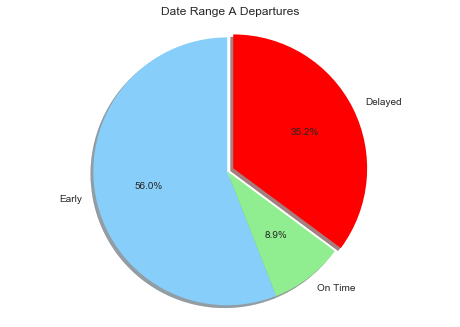

In [69]:
# Plot Date Range A Departures

Date_Range_A_Summary = [Sum_Early, Sum_On_Time, Sum_Delays]
Date_Range_A_Labels = ["Early", "On Time", "Delayed"]
colors = ["lightskyblue", "lightgreen", "red"]
explode = (0, 0, 0.05)

plt.title("Date Range A Departures")
plt.pie(Date_Range_A_Summary, autopct="%1.1f%%", explode=explode, labels=Date_Range_A_Labels, colors=colors, shadow=True, startangle=90)
plt.axis("equal")
plt.show()


In [70]:
# Compare total number of flights, average flights per day

# Plot average delay by hour in a random day during Date Range A
# Plot average delay by hour in a random day during Date Range B

In [71]:
df = pd.DataFrame(Date_Range_A_df)
df2 = df[df["Delay"] > 0]
df2

,Counter,Airport,Date,Delay
1,1,ATL,2017-12-22,356.0
2,2,ATL,2017-12-22,135.0
3,3,ATL,2017-12-22,21.0
4,4,ATL,2017-12-22,29.0
5,5,ATL,2017-12-22,35.0
6,6,ATL,2017-12-22,2.0
7,7,ATL,2017-12-22,15.0
8,8,ATL,2017-12-22,41.0
9,9,ATL,2017-12-22,11.0
10,10,ATL,2017-12-22,15.0


In [72]:
# Create the bins in which Data will be held
# Bins are 0, 15, 30, 45, 60
bins = [0, 15, 30, 45, 60, 1000]

# Create the names for the four bins
group_names = ["0-15 minutes", "15-30 minutes", "30-45 minutes", "45-60 minutes", "60 minutes plus"]

In [73]:
df2["Delay Group"] = pd.cut(df2["Delay"], bins, labels=group_names)
df2

C:\Users\macha\Anaconda3\envs\pythondata4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Counter,Airport,Date,Delay,Delay Group
1,1,ATL,2017-12-22,356.0,60 minutes plus
2,2,ATL,2017-12-22,135.0,60 minutes plus
3,3,ATL,2017-12-22,21.0,15-30 minutes
4,4,ATL,2017-12-22,29.0,15-30 minutes
5,5,ATL,2017-12-22,35.0,30-45 minutes
6,6,ATL,2017-12-22,2.0,0-15 minutes
7,7,ATL,2017-12-22,15.0,0-15 minutes
8,8,ATL,2017-12-22,41.0,30-45 minutes
9,9,ATL,2017-12-22,11.0,0-15 minutes
10,10,ATL,2017-12-22,15.0,0-15 minutes


In [74]:
# Summarize Date Range A
print(f"\nDeparture Summary for Date Range A\n")

Sum_1 = (df2['Delay Group'] == "0-15 minutes").sum()
print(f"Total 0-15: {Sum_1}")

Sum_2 = (df2['Delay Group'] == "15-30 minutes").sum()
print(f"Total 15-30: {Sum_2}")

Sum_3 = (df2['Delay Group'] == "30-45 minutes").sum()
print(f"Total 30-45: {Sum_3}")

Sum_4 = (df2['Delay Group'] == "45-60 minutes").sum()
print(f"Total 45-60: {Sum_4}")

Sum_5 = (df2['Delay Group'] == "60 minutes plus").sum()
print(f"Total 60+: {Sum_5}")

Sum_Departures = Date_Range_A_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


df2_Summary_data = {"0-15 minutes": [Sum_1], "15-30 minutes": [Sum_2], "30-45 minutes": [Sum_3], "45-60 minutes": [Sum_4], 
                    "60+ minutes": [Sum_5]}
df2_Summary_table = pd.DataFrame(df2_Summary_data)

df2_Summary_table.head()


Departure Summary for Date Range A

Total 0-15: 454
Total 15-30: 165
Total 30-45: 78
Total 45-60: 36
Total 60+: 78
Total Departures: 2307



,0-15 minutes,15-30 minutes,30-45 minutes,45-60 minutes,60+ minutes
0,454,165,78,36,78


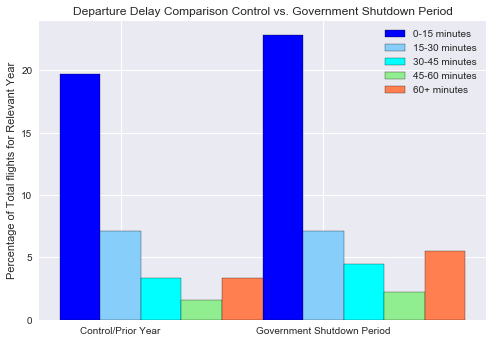

In [79]:
# libraries (values manually inserted)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("pastel")

# width of the bars
barWidth = 0.2

# Choose the height of the blue bars
bars1 = [19.70, 22.84]
# Choose the height of the lightskyblue bars
bars2 = [7.15, 7.09]
# Choose the height of the cyan bars
bars3 = [3.38, 4.50]
# Choose the height of the lightgreen bars
bars4 = [1.56, 2.21]
# Choose the height of the coral bars
bars5 = [3.38, 5.49]



# Choose the height of the error bars (bars1)
yer1 = [0, 0.0]

# Choose the height of the error bars (bars2)
yer2 = [0, 0.0]

yer3 = [0, 0.0]

yer4 = [0, 0.0]

yer5 = [0, 0.0]

# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=2, label='0-15 minutes')

# Create light sky blue bars
plt.bar(r2, bars2, width = barWidth, color = 'lightskyblue', edgecolor = 'black', yerr=yer2, capsize=2, label='15-30 minutes')

# Create cyan bars
plt.bar(r3, bars3, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer3, capsize=2, label='30-45 minutes')

# Create light green bars
plt.bar(r4, bars4, width = barWidth, color = 'lightgreen', edgecolor = 'black', yerr=yer4, capsize=2, label='45-60 minutes')

# Create bars
plt.bar(r5, bars5, width = barWidth, color = 'coral', edgecolor = 'black', yerr=yer5, capsize=2, label='60+ minutes')

# general layout
plt.style.use('seaborn')
plt.title("Departure Delay Comparison Control vs. Government Shutdown Period")
plt.xticks([r + barWidth for r in range(len(bars1))], ['Control/Prior Year','Government Shutdown Period'])
plt.ylabel('Percentage of Total flights for Relevant Year')
plt.legend()

# Show graphic
plt.savefig("Date_Range_A_B_DepartureDelay_Comparison_GovernmentShutdown.png")


plt.show()